# MARKET SEGMENTATION ANALYSIS ON EV BIKES

This project mainly focuses on the Indian EV Market and it's market segmenation which is derivied from their sales data ,production data, reviews and specifications.

In [15]:
#step 1 import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#step 2 Load the datasets
ev_sales = pd.read_excel(r'D:\Feynn Labs\2.1\Datasets\EV SALES.xlsx')  # Excel file
ev_bikes = pd.read_csv(r'D:\Feynn Labs\2.1\Datasets\EV bikes.csv')  # CSV file
buying_behaviour = pd.read_csv(r'D:\Feynn Labs\2.1\Datasets\Indian automoble buying behavour study 1.0.csv')  # CSV file
charging_stations = pd.read_csv(r'D:\Feynn Labs\2.1\Datasets\ev-charging-stations-india.csv')  # CSV file


In [17]:
#step 3 Display the first few rows of each dataset
print("EV Sales Data:")
print(ev_sales.head())
print("\nEV Bikes Data:")
print(ev_bikes.head())
print("\nBuying Behaviour Data:")
print(buying_behaviour.head())
print("\nCharging Stations Data:")
print(charging_stations.head())

EV Sales Data:
              Maker  2019-04-01 00:00:00  2019-05-01 00:00:00  \
0     Hero Electric                 1776                  455   
1  Okinawa Autotech                  984                  880   
2      Ather Energy                   28                  107   
3   Ampere Vehicles                    0                  103   
4            Revolt                    0                    0   

   2019-06-01 00:00:00  2019-07-01 00:00:00  2019-08-01 00:00:00  \
0                  329                  260                  249   
1                  731                  862                  882   
2                  464                  300                  183   
3                  107                   35                   57   
4                    0                    0                    0   

   2019-09-01 00:00:00  2019-10-01 00:00:00  2019-11-01 00:00:00  \
0                  245                  541                  859   
1                  940                 1036      

In [18]:
#step 4 Check for missing values
print("Missing Values in EV Sales:")
print(ev_sales.isnull().sum())
print("\nMissing Values in EV Bikes:")
print(ev_bikes.isnull().sum())
print("\nMissing Values in Buying Behaviour:")
print(buying_behaviour.isnull().sum())
print("\nMissing Values in Charging Stations:")
print(charging_stations.isnull().sum())

# step 5 Get a summary of each dataset
print("\nEV Sales Info:")
print(ev_sales.info())
print("\nEV Bikes Info:")
print(ev_bikes.info())
print("\nBuying Behaviour Info:")
print(buying_behaviour.info())
print("\nCharging Stations Info:")
print(charging_stations.info())


Missing Values in EV Sales:
Maker                  0
2019-04-01 00:00:00    0
2019-05-01 00:00:00    0
2019-06-01 00:00:00    0
2019-07-01 00:00:00    0
2019-08-01 00:00:00    0
2019-09-01 00:00:00    0
2019-10-01 00:00:00    0
2019-11-01 00:00:00    0
2019-12-01 00:00:00    0
2020-01-01 00:00:00    0
2020-02-01 00:00:00    0
2020-03-01 00:00:00    0
dtype: int64

Missing Values in EV Bikes:
Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

Missing Values in Buying Behaviour:
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

Missing Values in Chargi

In [19]:
#step 6 Handling the missing values
# Dropping rows with critical missing values
charging_stations = charging_stations.dropna(subset=['address', 'lattitude', 'longitude'])

# Filling missing values for 'type' with 'Unknown'
charging_stations['type'].fillna('Unknown', inplace=True)

# Check again for missing values
print("Missing Values in Charging Stations after cleaning:")
print(charging_stations.isnull().sum())


Missing Values in Charging Stations after cleaning:
name         0
state        0
city         0
address      0
lattitude    0
longitude    0
type         0
dtype: int64


In [20]:
#step 7  Apply Standardization (Z-score Normalization)

from sklearn.preprocessing import StandardScaler

# Define the numerical columns
num_cols = ['Price', 'Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization
ev_bikes[num_cols] = scaler.fit_transform(ev_bikes[num_cols])

# Display the standardized data
print("Standardized EV Bikes Data:")
print(ev_bikes.head())

# Verify the results
print(ev_bikes[num_cols].describe())



Standardized EV Bikes Data:
          Model Name     Price  Riding Range (km)  Top Speed (kmph)  \
0   Ampere Magnus EX  0.328069           0.591344          0.141144   
1  Ampere Magnus Pro -0.942471          -1.618925         -1.062987   
2         Ampere REO -1.075745          -1.618925         -1.062987   
3        Ampere Zeal  0.058434           0.562261          0.141144   
4         Ather 450X  1.336852           0.300519          1.732316   

   Weight (kg)  Battery Charging Time (hrs)  Rated Power (W)  
0    -0.308704                     0.966863        -0.127610  
1    -0.169116                     2.791428        -0.866354  
2    -0.378497                     2.791428        -0.866354  
3    -0.657673                     0.966863        -0.127610  
4     0.319441                     1.575052         1.272115  
              Price  Riding Range (km)  Top Speed (kmph)   Weight (kg)  \
count  3.900000e+01       3.900000e+01      3.900000e+01  3.900000e+01   
mean  -4.554761e-17

### Now We can move towards Exploratory Data Analysis

In [21]:
#step1. Basic Summary Statistics
# EV Sales Summary
print("EV Sales Summary:")
print(ev_sales.describe())
print(ev_sales.info())

# EV Bikes Summary
print("\nEV Bikes Summary:")
print(ev_bikes.describe())
print(ev_bikes.info())

# Buying Behaviour Summary
print("\nBuying Behaviour Summary:")
print(buying_behaviour.describe())
print(buying_behaviour.info())

# Charging Stations Summary
print("\nCharging Stations Summary:")
print(charging_stations.describe())
print(charging_stations.info())



EV Sales Summary:
       2019-04-01 00:00:00  2019-05-01 00:00:00  2019-06-01 00:00:00  \
count             6.000000              6.00000               6.0000   
mean            513.166667            278.00000             293.0000   
std             724.963011            333.13901             272.1698   
min               0.000000              0.00000               0.0000   
25%               7.000000            104.00000             112.0000   
50%             159.500000            115.00000             228.0000   
75%             810.750000            372.00000             430.2500   
max            1776.000000            880.00000             731.0000   

       2019-07-01 00:00:00  2019-08-01 00:00:00  2019-09-01 00:00:00  \
count             6.000000             6.000000             6.000000   
mean            261.333333           251.166667           259.666667   
std             317.622207           321.450100           342.692087   
min               0.000000             0.0000

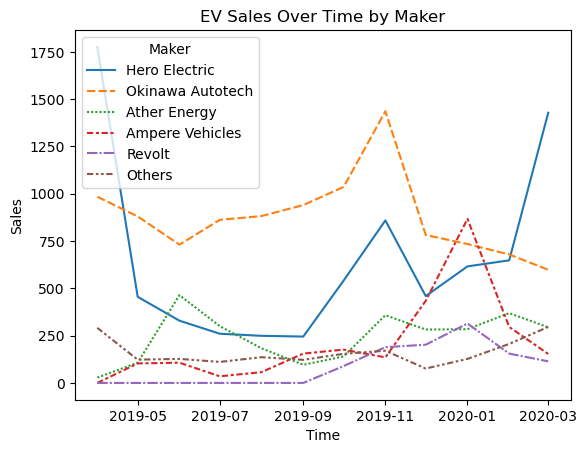

In [22]:
#step2. Visualizing Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing EV Sales
sns.lineplot(data=ev_sales.set_index('Maker').T)
plt.title('EV Sales Over Time by Maker')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()


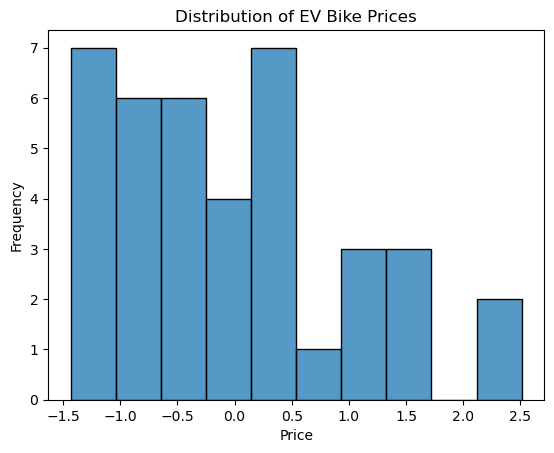

In [23]:
# Visualizing Price Distribution of EV Bikes
sns.histplot(ev_bikes['Price'], bins=10)
plt.title('Distribution of EV Bike Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

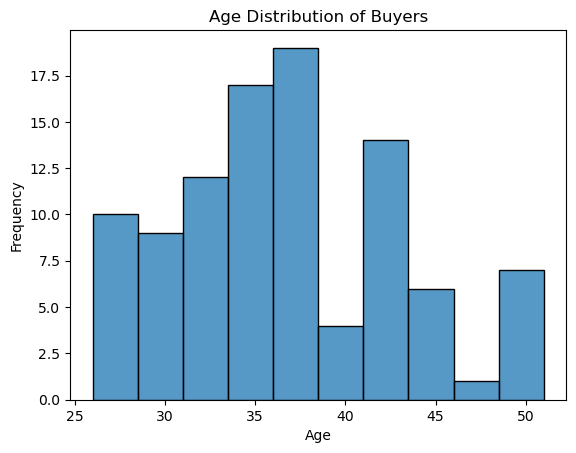

In [24]:
# Visualizing Age Distribution in Buying Behaviour
sns.histplot(buying_behaviour['Age'], bins=10)
plt.title('Age Distribution of Buyers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

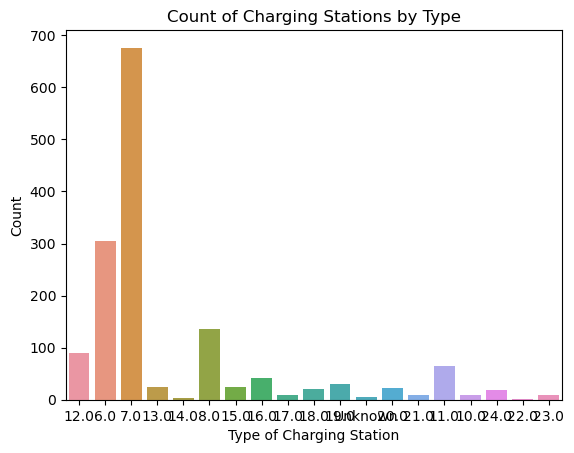

In [25]:
# Visualizing Charging Station Types
sns.countplot(data=charging_stations, x='type')
plt.title('Count of Charging Stations by Type')
plt.xlabel('Type of Charging Station')
plt.ylabel('Count')
plt.show()

In [26]:
#step3. Correlation Analysis

# Check the columns in the buying_behaviour DataFrame
print(buying_behaviour.columns)


Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')


In [27]:
# Assuming 'buying_behaviour' is the DataFrame containing the buying behavior data
# Step 1: One-hot encode the categorical variables
buying_behaviour_encoded = pd.get_dummies(buying_behaviour, drop_first=True)

# Check the columns after encoding
print(buying_behaviour_encoded.columns)


Index(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary',
       'Price', 'Profession_Salaried', 'Marrital Status_Single',
       'Education_Post Graduate', 'Personal loan_Yes', 'House Loan_Yes',
       'Wife Working_Yes', 'Wife Working_m', 'Make_Ciaz', 'Make_City',
       'Make_Creata', 'Make_Duster', 'Make_Luxuray', 'Make_SUV', 'Make_Verna',
       'Make_i20'],
      dtype='object')


In [28]:
# Drop 'Make' column if it exists
if 'Make' in buying_behaviour_encoded.columns:
    buying_behaviour_encoded.drop(['Make'], axis=1, inplace=True)


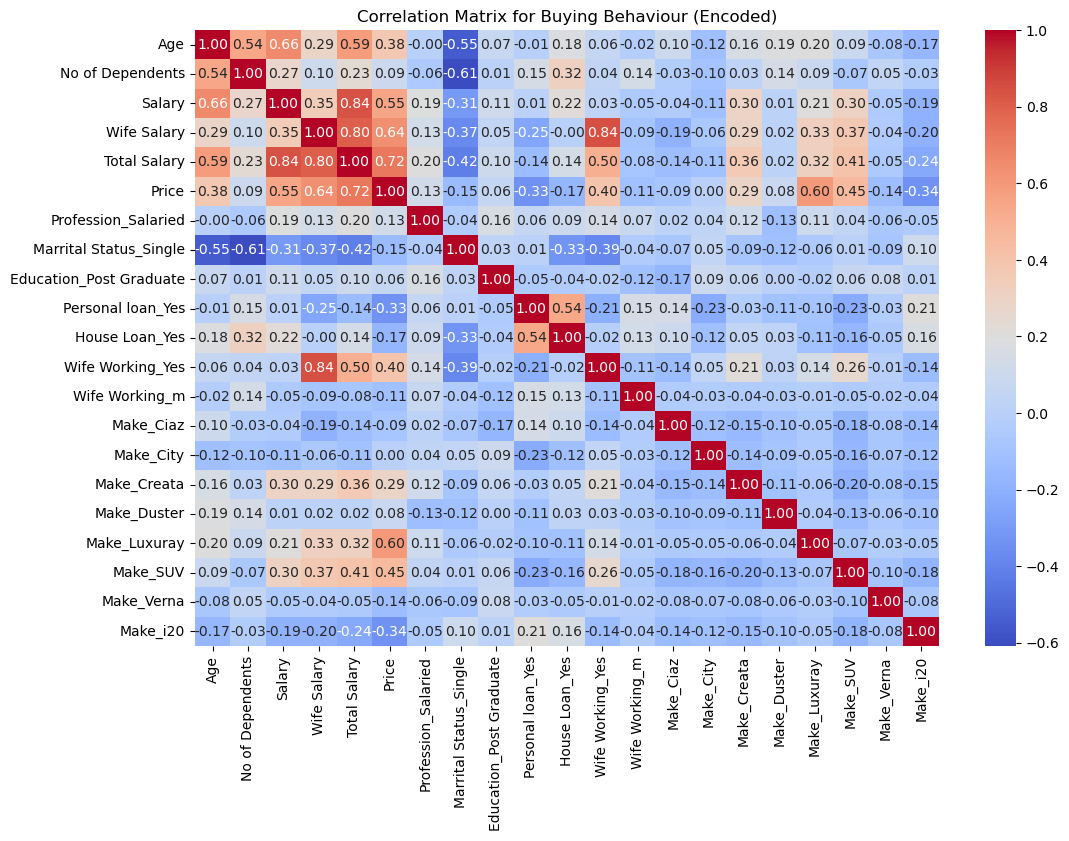

In [29]:
# Calculate the correlation matrix
correlation_matrix = buying_behaviour_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Buying Behaviour (Encoded)')
plt.show()


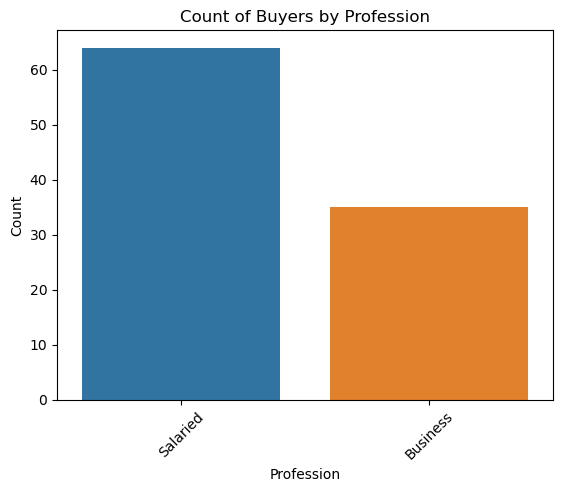

In [33]:
#step 4. Categorical Data Analysis
# Categorical Analysis for Buying Behaviour
sns.countplot(data=buying_behaviour, x='Profession')
plt.title('Count of Buyers by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

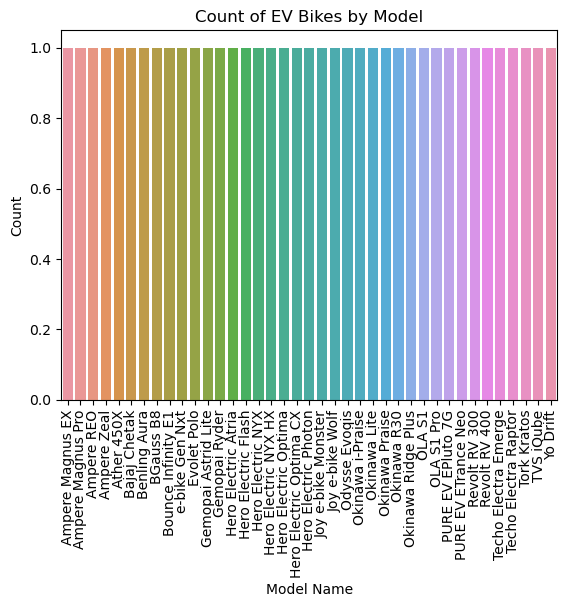

In [33]:
# Categorical Analysis for EV Bikes
sns.countplot(data=ev_bikes, x='Model Name')
plt.title('Count of EV Bikes by Model')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Market Segmentation Analysis




In [4]:
# Load the dataset (assuming you have it in a CSV)
import pandas as pd

df_bikes = pd.read_csv(r'D:\Feynn Labs\2.1\Datasets\EV bikes.csv') 
print(df_bikes.head())  # Preview the first few rows of the dataset


          Model Name   Price  Riding Range (km)  Top Speed (kmph)  \
0   Ampere Magnus EX  104758                121                53   
1  Ampere Magnus Pro   66053                 45                25   
2         Ampere REO   61993                 45                25   
3        Ampere Zeal   96544                120                53   
4         Ather 450X  135489                111                90   

   Weight (kg)  Battery Charging Time (hrs)  Rated Power (W)  
0           90                            7             1200  
1           94                           10              250  
2           88                           10              250  
3           80                            7             1200  
4          108                            8             3000  


In [5]:
# Selecting the columns that are relevant for clustering
columns_to_cluster = ['Price', 'Riding Range (km)', 'Top Speed (kmph)', 
                      'Battery Charging Time (hrs)', 'Rated Power (W)']

# Checking if there are any non-numeric values
print(df_bikes[columns_to_cluster].dtypes)

# If there are any issues with non-numeric values, handle them by converting or dropping rows:
# For now, ensure the columns are numeric by removing or converting any problematic entries
df_bikes_cleaned = df_bikes[columns_to_cluster].dropna()  # Drop rows with missing values

print(df_bikes_cleaned.head())  # Verify the cleaned dataset


Price                          int64
Riding Range (km)              int64
Top Speed (kmph)               int64
Battery Charging Time (hrs)    int64
Rated Power (W)                int64
dtype: object
    Price  Riding Range (km)  Top Speed (kmph)  Battery Charging Time (hrs)  \
0  104758                121                53                            7   
1   66053                 45                25                           10   
2   61993                 45                25                           10   
3   96544                120                53                            7   
4  135489                111                90                            8   

   Rated Power (W)  
0             1200  
1              250  
2              250  
3             1200  
4             3000  


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the cleaned data
scaled_df = scaler.fit_transform(df_bikes_cleaned)

# Convert back to a DataFrame for easier inspection
scaled_df = pd.DataFrame(scaled_df, columns=columns_to_cluster)

print(scaled_df.head())  # Check scaled data


      Price  Riding Range (km)  Top Speed (kmph)  Battery Charging Time (hrs)  \
0  0.328069           0.591344          0.141144                     0.966863   
1 -0.942471          -1.618925         -1.062987                     2.791428   
2 -1.075745          -1.618925         -1.062987                     2.791428   
3  0.058434           0.562261          0.141144                     0.966863   
4  1.336852           0.300519          1.732316                     1.575052   

   Rated Power (W)  
0        -0.127610  
1        -0.866354  
2        -0.866354  
3        -0.127610  
4         1.272115  


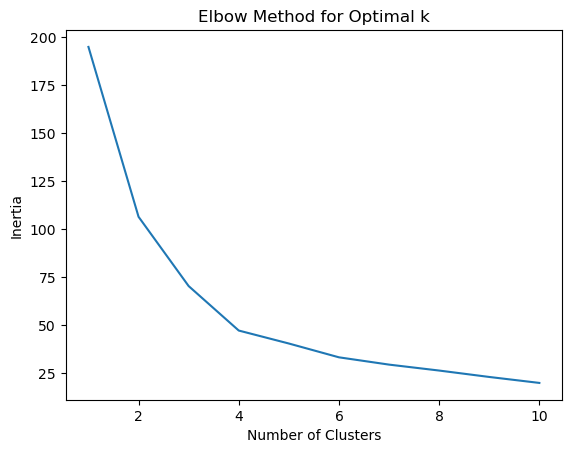

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [42]:
# Choose the optimal number of clusters, say k=3 based on the elbow method
optimal_k = 2  # You can set this based on your analysis
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df_bikes['Cluster'] = kmeans.labels_

In [43]:
from sklearn.cluster import KMeans

# Apply KMeans with the chosen number of clusters, e.g., k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_bikes_cleaned['Cluster'] = kmeans.fit_predict(scaled_df)

# Check the resulting clusters
print(df_bikes_cleaned[['Price', 'Riding Range (km)', 'Top Speed (kmph)', 'Cluster']].head())


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    Price  Riding Range (km)  Top Speed (kmph)  Cluster
0  104758                121                53        0
1   66053                 45                25        0
2   61993                 45                25        0
3   96544                120                53        0
4  135489                111                90        1


In [44]:
# Group by the clusters and get descriptive statistics
cluster_summary = df_bikes_cleaned.groupby('Cluster').mean()
print(cluster_summary)

# Check the size of each cluster
print(df_bikes_cleaned['Cluster'].value_counts())


                 Price  Riding Range (km)  Top Speed (kmph)  \
Cluster                                                       
0         79704.000000          86.607143         38.714286   
1        133098.181818         136.454545         77.727273   

         Battery Charging Time (hrs)  Rated Power (W)  
Cluster                                                
0                           5.285714       721.428571  
1                           5.727273      3000.000000  
Cluster
0    28
1    11
Name: count, dtype: int64


### Visualize the cluster 

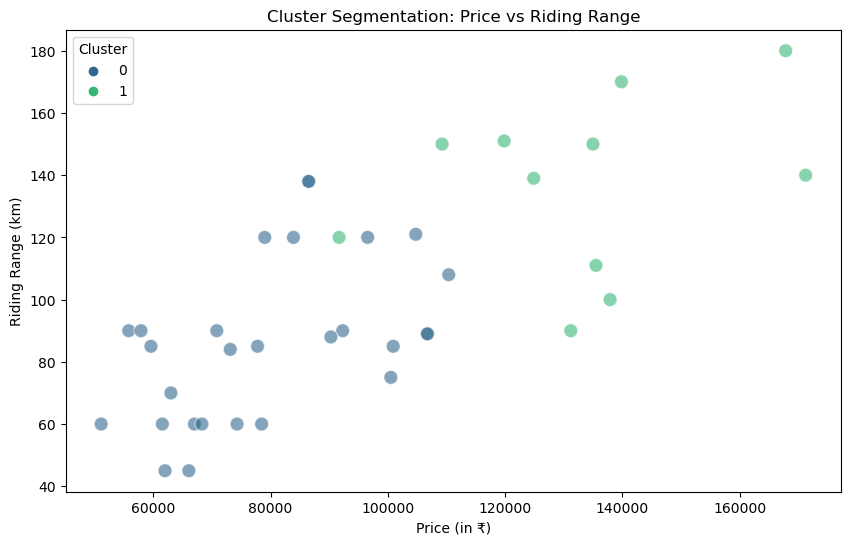

In [45]:
# Assuming you have your KMeans model and clustered the data
# Assign cluster labels to the DataFrame
df_bikes_cleaned['Cluster'] = kmeans.labels_

# Now we can plot using the correct 'Cluster' labels
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Price vs Riding Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_bikes_cleaned['Price'], 
                y=df_bikes_cleaned['Riding Range (km)'], 
                hue=df_bikes_cleaned['Cluster'],  # Corrected cluster labels from the DataFrame
                palette='viridis', 
                s=100, 
                alpha=0.6)

plt.title('Cluster Segmentation: Price vs Riding Range')
plt.xlabel('Price (in ₹)')
plt.ylabel('Riding Range (km)')
plt.show()



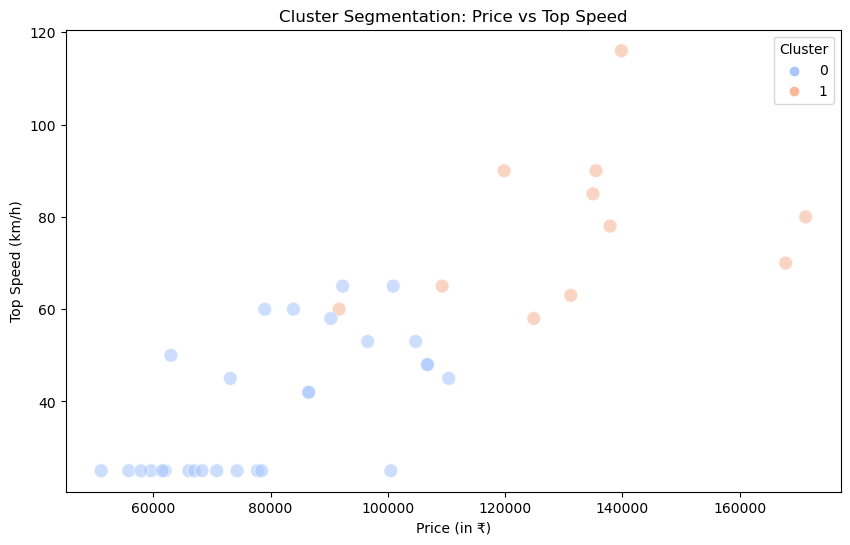

In [46]:
# Scatter plot for Price vs Top Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_bikes_cleaned['Price'], 
                y=df_bikes_cleaned['Top Speed (kmph)'], 
                hue=df_bikes_cleaned['Cluster'],  # Corrected cluster labels from the DataFrame
                palette='coolwarm', 
                s=100, 
                alpha=0.6)

plt.title('Cluster Segmentation: Price vs Top Speed')
plt.xlabel('Price (in ₹)')
plt.ylabel('Top Speed (km/h)')
plt.show()


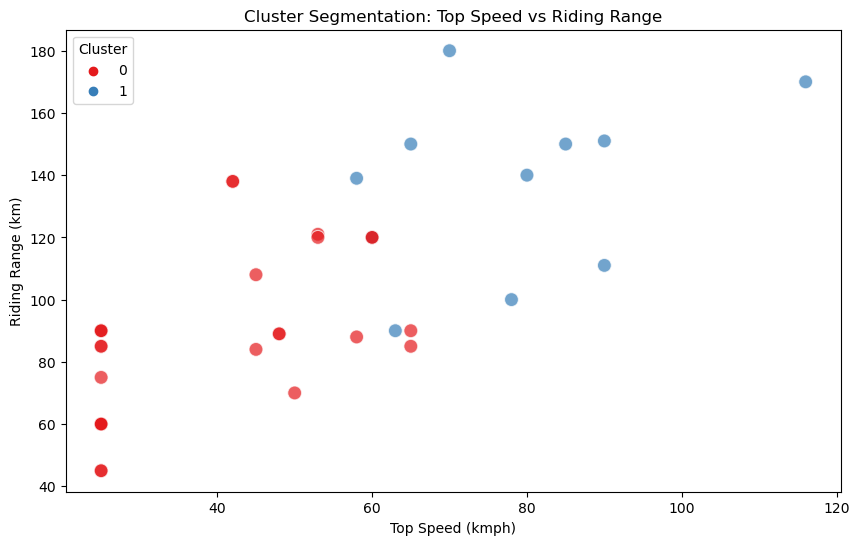

In [47]:
# Scatter plot for Top Speed vs Riding Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_bikes_cleaned['Top Speed (kmph)'], 
                y=df_bikes_cleaned['Riding Range (km)'], 
                hue=df_bikes_cleaned['Cluster'], 
                palette='Set1', 
                s=100, 
                alpha=0.7)

plt.title('Cluster Segmentation: Top Speed vs Riding Range')
plt.xlabel('Top Speed (kmph)')
plt.ylabel('Riding Range (km)')
plt.show()


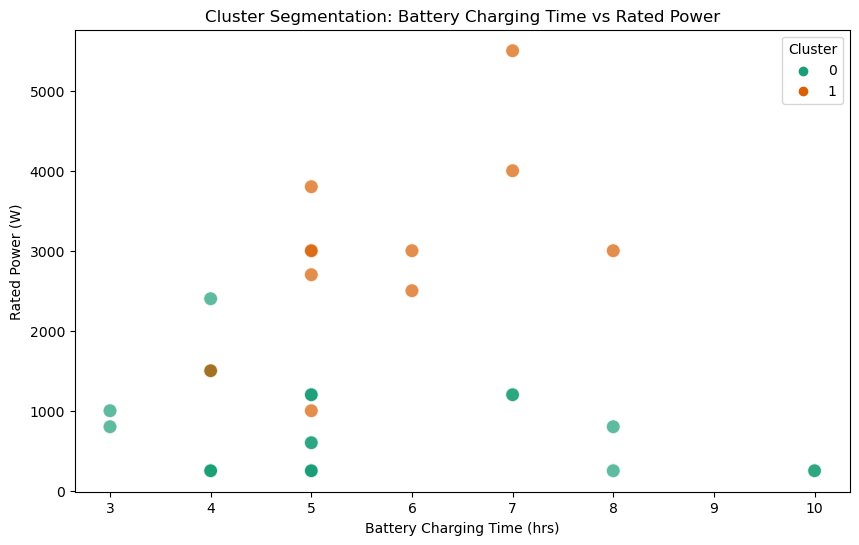

In [48]:
# Scatter plot for Battery Charging Time vs Rated Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_bikes_cleaned['Battery Charging Time (hrs)'], 
                y=df_bikes_cleaned['Rated Power (W)'], 
                hue=df_bikes_cleaned['Cluster'], 
                palette='Dark2', 
                s=100, 
                alpha=0.7)

plt.title('Cluster Segmentation: Battery Charging Time vs Rated Power')
plt.xlabel('Battery Charging Time (hrs)')
plt.ylabel('Rated Power (W)')
plt.show()


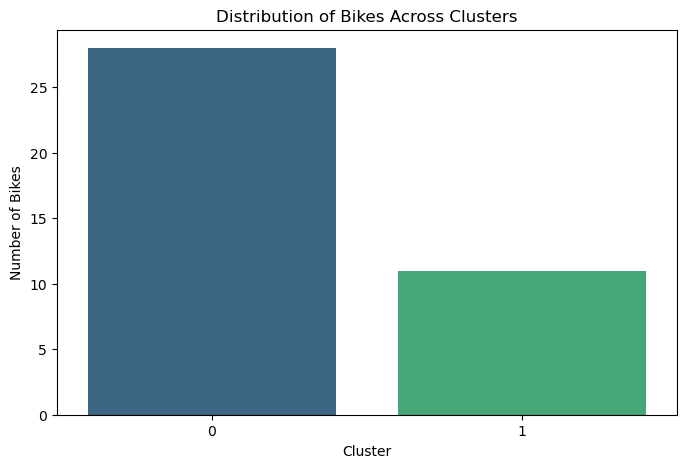

In [49]:
# Bar plot for the number of bikes in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=df_bikes_cleaned['Cluster'], palette='viridis')

plt.title('Distribution of Bikes Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Bikes')
plt.show()
